In [1]:
import math
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import utility as util

In [2]:
# Setup and global variables
# --------------------------
# Set the path to the data directory
fig_dir = "img/"
# Plotting setup and style
viridis_cmap = plt.get_cmap("viridis")
plasma_cmap = plt.get_cmap("plasma")
inferno_cmap = plt.get_cmap("inferno")
magma_cmap = plt.get_cmap("magma")

sns.set_style("darkgrid")

In [10]:
def gilbert_elliot(E: str = "e1"):
    # # Set environment
    # E = "e3"
    # Initialize model parameters for E1
    if E == "e1":
        p_G = 0.1 * (10 ** (-35)) # Probability of good state
        p_B = 0.000197264442772   # Probability of bad state
        p_p = 0.0000132518942     # Probability of state transition from good to bad
        p_r = 0.00000921436463    # Probability of state transition from bad to good

    # Initialize model parameters for E2
    elif E == "e2":
        p_G = 5.0 * (10 ** (-4))  # Probability of good state
        p_B = 1.0 * (10 ** (-2))  # Probability of bad state
        p_p = 4.0 * (10 ** (-3))  # Probability of state transition from good to bad
        p_r = 6.0 * (10 ** (-3))  # Probability of state transition from bad to good

    # Initialize model parameters for E3
    elif E == "e3":
        p_G = 1.0 * (10 ** (-3))  # Probability of good state
        p_B = 1.0 * (10 ** (-1))  # Probability of bad state
        p_p = 1.0 * (10 ** (-2))  # Probability of state transition from good to bad
        p_r = 1.0 * (10 ** (-3))  # Probability of state transition from bad to good

    # Initialize state
    # Good state : "g"
    # Bad state  : "b"
    state = "G"

    # Initialize packet size
    packet_size = 265
    packet_count = 0
    packet_errors = 0
    packet_list = []

    # Initialize count
    count = 0

    # Initialize number of steps to simulate
    bits = 500000

    # Initialize number of errors to 0
    errors = 0

    # Simulate transmissions
    for i in range(bits):

        # If state is good, determine if it transitions to bad
        if state == "G":
            if random.random() < p_p:
                state = "B"
        # If state is bad, determine if it transitions to good
        elif state == "B":
            if random.random() < p_r:
                state = "G"

        # Error
        if state == "B":
            if random.random() < p_B:
                errors += 1
                packet_errors += 1
        elif state == "G":
            if random.random() < p_G:
                errors += 1
                packet_errors += 1

        # Count packets
        if count == packet_size:
            # Add packet errors to packet list
            packet_list.append(packet_errors)
            packet_count += 1

            # Reset counts
            packet_errors = 0
            count = 0

        count += 1
    
    return packet_list, packet_count, bits, errors

packet_list, packet_count, bits, errors = gilbert_elliot(E="e2")
# Print packets
print(f"Packets transmitted: {packet_count}")


# Print packets
print(f"Packets with errors = 0: {packet_list.count(0)}")
print(f"Packets with errors = 1: {packet_list.count(1)}")
print(f"Packets with errors >= 2: {len([x for x in packet_list if x >= 2])}")

# Print bits transmitted
print(f"Bits transmitted: {bits-errors}/{bits}")

# Print total errors and transmissions
print(f"Errors/packets: {errors}/{bits}")

# Print the error rate
print(f"Error rate: {errors / bits:.6f}")

Packets transmitted: 1886
Packets with errors = 0: 828
Packets with errors = 1: 443
Packets with errors >= 2: 615
Bits transmitted: 497800/500000
Errors/packets: 2200/500000
Error rate: 0.004400


In [48]:
packet_list1, packet_count1, bits1, errors1 = gilbert_elliot(E="e1")
packet_list2, packet_count2, bits2, errors2 = gilbert_elliot(E="e2")
packet_list3, packet_count3, bits3, errors3 = gilbert_elliot(E="e3")

print("\nEnvironment 1")
print(f"Packets transmitted: {packet_count1}")
# Print packets
print(f"Packets with errors = 0: {packet_list1.count(0)}")
print(f"Packets with errors = 1: {packet_list1.count(1)}")
print(f"Packets with errors >= 2: {len([x for x in packet_list1 if x >= 2])}")
# Print bits transmitted
print(f"Bits transmitted: {bits1 - errors1}/{bits1}")
# Print total errors and transmissions
print(f"Errors/packets: {errors1}/{bits1}")
# Print the error rate
print(f"Error rate: {errors1 / bits1:.6f}")

print("\nEnvironment 2")
print(f"Packets transmitted: {packet_count2}")
# Print packets
print(f"Packets with errors = 0: {packet_list2.count(0)}")
print(f"Packets with errors = 1: {packet_list2.count(1)}")
print(f"Packets with errors >= 2: {len([x for x in packet_list2 if x >= 2])}")
# Print bits transmitted
print(f"Bits transmitted: {bits2 - errors2}/{bits2}")
# Print total errors and transmissions
print(f"Errors/packets: {errors2}/{bits2}")
# Print the error rate
print(f"Error rate: {errors2 / bits2:.6f}")

print("\nEnvironment 3")
print(f"Packets transmitted: {packet_count3}")
# Print packets
print(f"Packets with errors = 0: {packet_list3.count(0)}")
print(f"Packets with errors = 1: {packet_list3.count(1)}")
print(f"Packets with errors >= 2: {len([x for x in packet_list3 if x >= 2])}")
# Print bits transmitted
print(f"Bits transmitted: {bits3 - errors3}/{bits3}")
# Print total errors and transmissions
print(f"Errors/packets: {errors3}/{bits3}")
# Print the error rate
print(f"Error rate: {errors3 / bits3:.6f}")


Environment 1
Packets transmitted: 1886
Packets with errors = 0: 1866
Packets with errors = 1: 19
Packets with errors >= 2: 1
Bits transmitted: 499979/500000
Errors/packets: 21/500000
Error rate: 0.000042

Environment 2
Packets transmitted: 1886
Packets with errors = 0: 852
Packets with errors = 1: 450
Packets with errors >= 2: 584
Bits transmitted: 497905/500000
Errors/packets: 2095/500000
Error rate: 0.004190

Environment 3
Packets transmitted: 1886
Packets with errors = 0: 10
Packets with errors = 1: 6
Packets with errors >= 2: 1870
Bits transmitted: 454722/500000
Errors/packets: 45278/500000
Error rate: 0.090556


In [49]:
# Plotting

cols = util.get_colors_from_cmap(3, viridis_cmap)

def show_histogram(packet_list, title, filename, col, size=(5, 3)):
    fig, ax = plt.subplots(figsize=size)
    # Center x-axis
    data = np.array(packet_list)

    # Plot histogram
    d = np.diff(np.unique(data)).min()
    left_of_first_bin = data.min() - float(d) / 2
    right_of_last_bin = data.max() + float(d) / 2

    r = range(math.floor(min(packet_list)), math.ceil(max(packet_list))+1)
    ax.set_xticks(r)
    ax.set_xlabel("Number of bit errors in packet")
    ax.set_ylabel("Number of packets")
    ax.set_xlim(left_of_first_bin, right_of_last_bin)

    # Plot histogram
    counts, edges, bars = ax.hist(data, np.arange(left_of_first_bin, right_of_last_bin + d, d), color = col, ec='none')
    ax.bar_label(bars, fmt='%d', padding=3)
    ax.set_title(title)

    return fig, ax


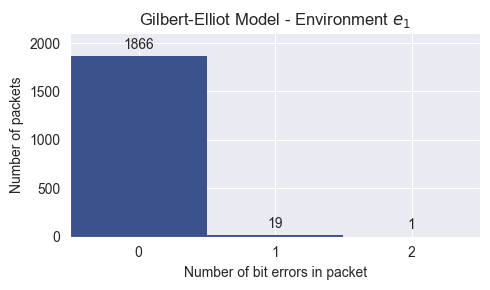

In [50]:
fig, ax = show_histogram(packet_list1, r"Gilbert-Elliot Model - Environment $e_1$", "gilbert_elliot_e1", cols[0])

ax.set_ylim(0, 2100)

fig.tight_layout()
plt.show()

# Save figure as png and pdf
fig.savefig(fig_dir + "png/gilbert_elliot_e1" + ".png", dpi=300)
fig.savefig(fig_dir + "pdf/gilbert_elliot_e1" + ".pdf")

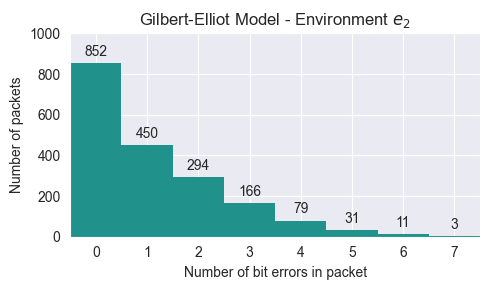

In [51]:
fig, ax = show_histogram(packet_list2, r"Gilbert-Elliot Model - Environment $e_2$", "gilbert_elliot_e2", cols[1])

ax.set_ylim(0, 1000)

fig.tight_layout()
plt.show()

# Save figure as png and pdf
fig.savefig(fig_dir + "png/gilbert_elliot_e2" + ".png", dpi=300)
fig.savefig(fig_dir + "pdf/gilbert_elliot_e2" + ".pdf")

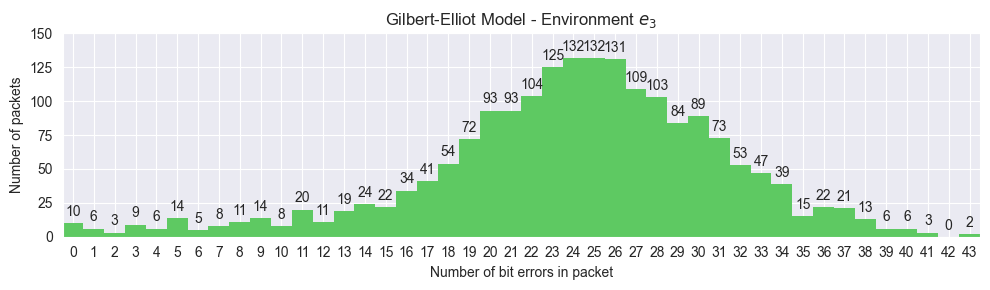

In [52]:
fig, ax = show_histogram(packet_list3, r"Gilbert-Elliot Model - Environment $e_3$", "gilbert_elliot_e3", cols[2], size=(10,3))

ax.set_ylim(0, 150)

fig.tight_layout()
plt.show()

# Save figure as png and pdf
fig.savefig(fig_dir + "png/gilbert_elliot_e3" + ".png", dpi=300)
fig.savefig(fig_dir + "pdf/gilbert_elliot_e3" + ".pdf")